In [84]:
!pip install useful_rdkit_utils

In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
import useful_rdkit_utils as uru
import numpy as np
import requests

In [2]:
def read_sdf(infile_name):
    suppl = Chem.SDMolSupplier(infile_name)
    for mol in suppl:
        break
    return(mol)

def download_file(url, filename):
    res = requests.get(url)
    if res.ok:
        ofs = open(filename,"w")
        ofs.write(res.text)
        ofs.close()
        res = True
    else:
        print(f"Could not download {url}")
        res = False
    return res

In [3]:
uru.rd_enable_png()

In [4]:
download_file("https://raw.githubusercontent.com/PatWalters/datafiles/main/docking/1bmk_xray_ligand.sdf","1bmk_xray_ligand.sdf")
download_file("https://raw.githubusercontent.com/PatWalters/datafiles/main/docking/1bmk_docked_ligand.sdf","1bmk_docked_ligand.sdf")

True

In [5]:
docked_mol = read_sdf("1bmk_docked_ligand.sdf")
xray_mol = read_sdf("1bmk_xray_ligand.sdf")

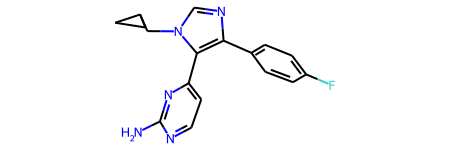

In [6]:
xray_mol

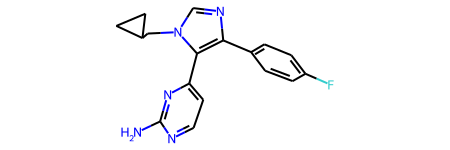

In [7]:
docked_mol

In [8]:
def calc_rmsd_in_place(ref_mol, fit_mol):
    """Calculate RMSD between two molecule in place, no translation or rotation is performed
    :param ref_mol: reference molecule
    :param: fit_mol: probe molecule to measure against ref_mol
    :return: rms fit value
    """
    # make a copy of each molecule and remove hydrogens
    ref_mol = Chem.RemoveAllHs(Chem.Mol(ref_mol))
    fit_mol = Chem.RemoveAllHs(Chem.Mol(fit_mol))
    # Make sure the two molecules are the same
    ref_smi = Chem.MolToSmiles(ref_mol)
    fit_smi = Chem.MolToSmiles(fit_mol)
    assert(ref_smi == fit_smi)
    # Get the coordinates
    ref_crds = ref_mol.GetConformer(0).GetPositions()
    fit_crds = fit_mol.GetConformer(0).GetPositions()
    # Get the symmetry mappings
    match_list = ref_mol.GetSubstructMatches(fit_mol, uniquify = False)
    # Calculate RMSD for all mappings and return the lowest value
    rmsd_list = []
    for match in match_list:
        fit_crds = fit_crds[list(match)]
        rmsd = np.sqrt(((((ref_crds - fit_crds)** 2))*3).mean())
        rmsd_list.append(rmsd)
    return min(rmsd_list)

In [9]:
calc_rmsd_in_place(xray_mol, docked_mol)

0.36208459917058283